In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.datasets import load_digits
digits = load_digits()
from sklearn.metrics import accuracy_score

In [16]:
car_co2 = pd.read_csv(
    "/home/alastair_oberon/Shenanigans/Coding_shenanigans/Juplab_env/TM_AI_Env/Test_CSV/Car_CO2.csv"
)
car_co2


,Car,Model,Volume,Weight,CO2,Unnamed: 5
0,Toyota,Aygo,1000,790,99,NaN
1,Mitsubishi,Space Star,1200,1160,95,NaN
2,Skoda,Citigo,1000,929,95,NaN
3,Fiat,500,900,865,90,NaN
4,Mini,Cooper,1500,1140,105,NaN
5,VW,Up!,1000,929,105,NaN
6,Skoda,Fabia,1400,1109,90,NaN
7,Mercedes,A-Class,1500,1365,92,NaN
8,Ford,Fiesta,1500,1112,98,NaN
9,Audi,A1,1600,1150,99,NaN


In [17]:
car_co2.drop(["Unnamed: 5"], axis = 1, inplace = True)
car_co2


,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [18]:
company_enc = LabelEncoder()
model_enc = LabelEncoder()

In [19]:
car_co2["Car"] = company_enc.fit_transform(car_co2["Car"])
car_co2["Model"] = model_enc.fit_transform(car_co2["Model"])

In [20]:
x_car_co2 = car_co2.drop(["CO2"], axis = 1)
y_car_co2 = car_co2["CO2"]

In [21]:
x_car_co2_train,x_car_co2_test,y_car_co2_train,y_car_co2_test = train_test_split(x_car_co2,y_car_co2, test_size=0.3, random_state=1)

In [22]:
car_co2_model = RandomForestRegressor()
car_co2_model.fit(x_car_co2_train,y_car_co2_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
print(car_co2_model.score(x_car_co2_train, y_car_co2_train) * 100)
print(car_co2_model.score(x_car_co2_test, y_car_co2_test) * 100)

80.20222403839466
26.53862218103178


In [24]:
ypred = car_co2_model.predict(x_car_co2_test)
ypred

array([102.71, 104.53, 103.58,  97.18,  98.68, 101.25, 102.52,  99.14,
       107.22, 103.38, 105.39])

In [25]:
r2_car_co2 = r2_score(y_car_co2_test,ypred)
print("R2_Score: ",  r2_car_co2)

R2_Score:  0.2653862218103178


In [27]:
dir(digits)
digits["target"]
digits["target_names"]
digits["data"]

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

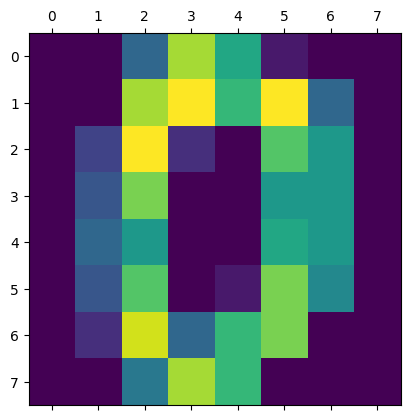

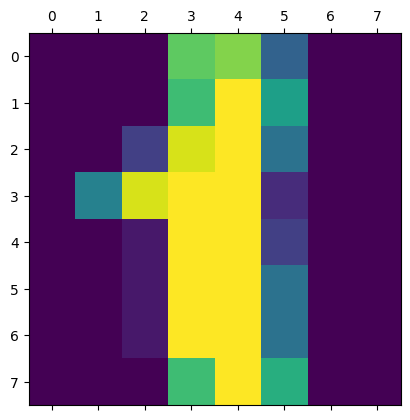

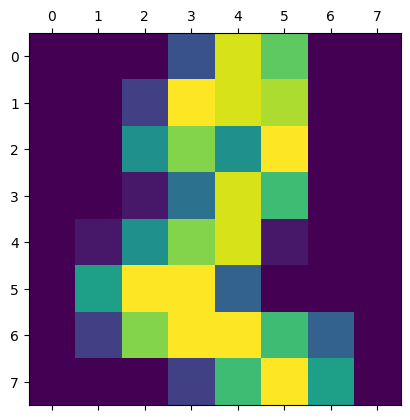

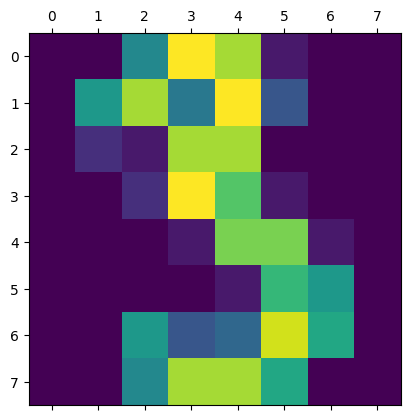

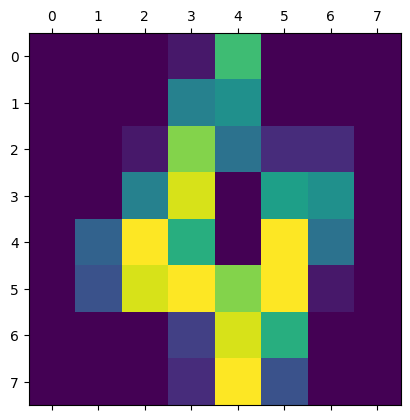

In [29]:
for i in range(5):
    plt.matshow(digits.images[i])

In [57]:
data1_2 = pd.DataFrame(digits.data)
data1_2["target"] = digits.target
data1_2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,15.0,1.0,0.0,0.0,4.0,16.0,7.0,3.0,16.0,7.0,0.0,0.0,5.0,16.0,10.0,7.0,16.0,4.0,0.0,0.0,0.0,5.0,14.0,14.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,4.0,7.0,7.0,16.0,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [58]:
data1_2.shape

(1797, 65)

In [66]:
x_data1_2 = data1_2.drop(["target"], axis = 1)
y_data1_2 = data1_2["target"]

In [67]:
x_data1_2_train,x_data1_2_test,y_data1_2_train,y_data1_2_test = train_test_split(x_data1_2,y_data1_2, test_size=0.3, random_state=1)


In [68]:
data1_2_model = RandomForestRegressor(n_estimators=200)
data1_2_model.fit(x_data1_2_train,y_data1_2_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [69]:
print(data1_2_model.score(x_data1_2_train, y_data1_2_train) * 100)
print(data1_2_model.score(x_data1_2_test, y_data1_2_test) * 100)


98.24929618621556
87.19611498158008


In [70]:
ypred_data1_2 = data1_2_model.predict(x_data1_2_test)
print(ypred_data1_2)


[1.195e+00 5.235e+00 0.000e+00 6.675e+00 1.400e+00 0.000e+00 5.620e+00
 1.920e+00 4.975e+00 4.225e+00 8.295e+00 2.255e+00 3.540e+00 7.845e+00
 3.640e+00 5.790e+00 8.160e+00 3.290e+00 6.850e+00 4.130e+00 5.855e+00
 1.565e+00 7.000e+00 5.720e+00 2.750e-01 7.685e+00 5.775e+00 1.150e+00
 4.710e+00 6.825e+00 5.030e+00 7.865e+00 7.255e+00 2.770e+00 2.005e+00
 6.840e+00 7.685e+00 1.480e+00 1.235e+00 1.035e+00 6.370e+00 6.490e+00
 1.870e+00 2.500e-02 7.555e+00 6.775e+00 2.020e+00 6.775e+00 3.930e+00
 3.570e+00 4.285e+00 3.180e+00 4.240e+00 1.650e-01 2.885e+00 6.900e+00
 1.750e-01 5.385e+00 5.255e+00 4.865e+00 2.620e+00 1.450e+00 6.745e+00
 4.000e-01 4.835e+00 1.270e+00 4.650e+00 3.150e+00 3.310e+00 4.090e+00
 3.150e-01 3.855e+00 6.925e+00 4.300e+00 5.380e+00 2.520e+00 2.100e+00
 8.585e+00 6.525e+00 4.140e+00 2.500e+00 5.010e+00 3.755e+00 4.335e+00
 1.780e+00 5.180e+00 4.920e+00 1.975e+00 4.125e+00 2.735e+00 2.930e+00
 3.605e+00 2.040e+00 7.040e+00 7.550e-01 7.505e+00 1.330e+00 6.100e+00
 4.215

In [71]:
print("Accuracy Score is: ", accuracy_score(ypred_data1_2,y_data1_2_test))

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [ ]:
cm = confusion_matrix(y_data1_2_test, ypred_data1_2)

In [ ]:
plt.figure(figsize=(7,5))

sns.heatmap(cm, annot = True)